# Project 5 Mushroom Data Set

Objective - To identify edibility of mushroom based on provided characters

There are only two categories hence Logistic regression can be used

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

# Loading data set with correct column names

In [2]:
col_names = ['Edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
'stalk-shape','stalk-root','stalk-surface-above-ring',
'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
'spore-print-color','population','habitat']

In [3]:
#loading/importing dataset
msh = pd.read_csv('mushroom.csv',header = None , names = col_names)
msh.head()

,Edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# EDA

In [4]:
msh.shape

(8124, 23)

In [5]:
msh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edibility                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
msh.keys()

Index(['Edibility', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
val = ['Edibility','cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color',
'stalk-shape','stalk-root','stalk-surface-above-ring',
'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
'spore-print-color','population','habitat']
for i in val:
    msh[i] = le.fit_transform(msh[i])

In [8]:
msh.head()

,Edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
msh.describe()

,Edibility,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [10]:
msh.skew()

Edibility                   0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

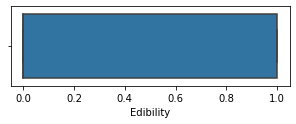

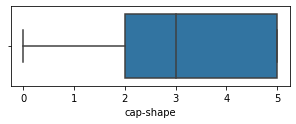

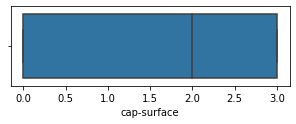

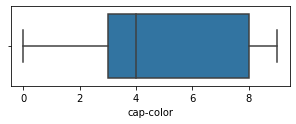

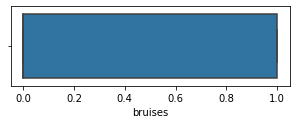

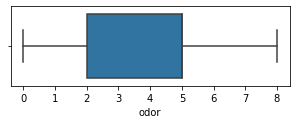

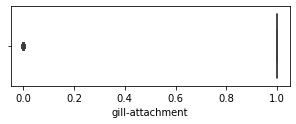

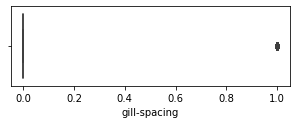

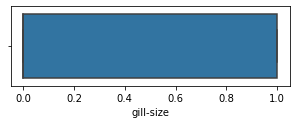

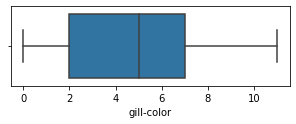

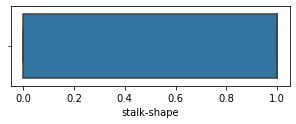

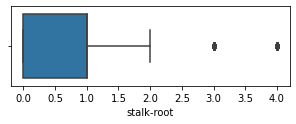

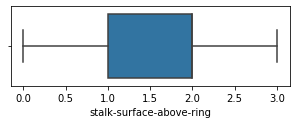

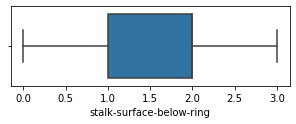

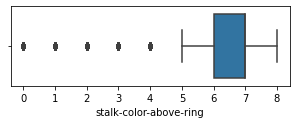

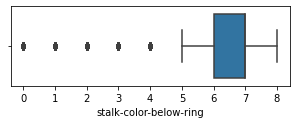

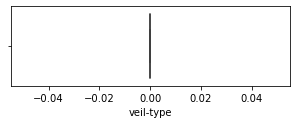

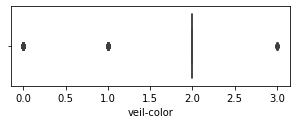

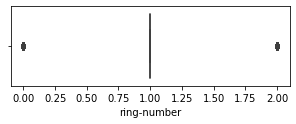

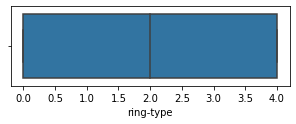

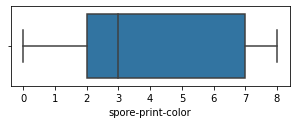

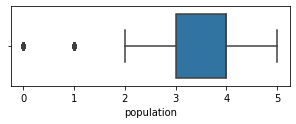

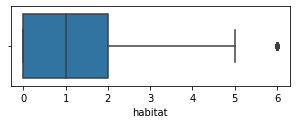

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
collist = msh.columns.values
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(23,1,i+1)
    sns.boxplot(msh[collist[i]])
    plt.show()

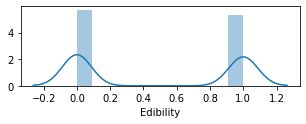

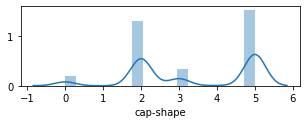

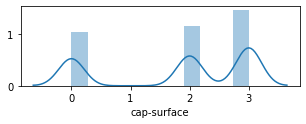

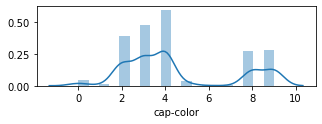

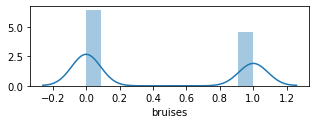

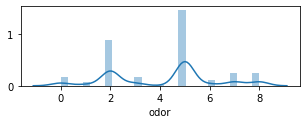

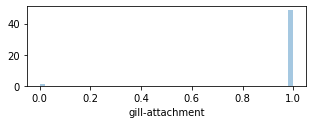

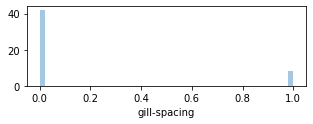

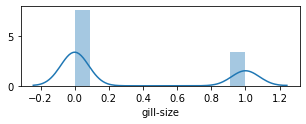

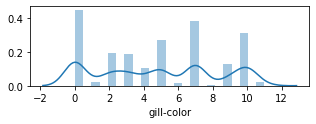

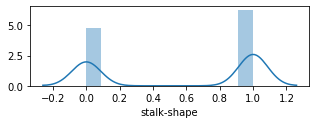

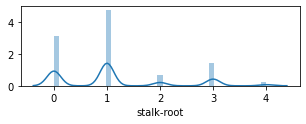

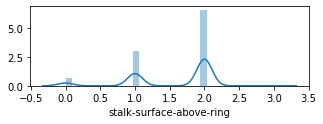

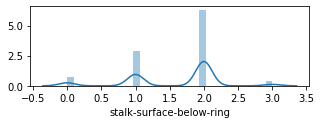

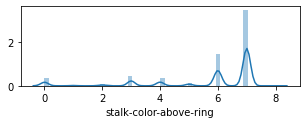

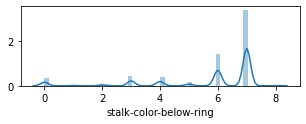

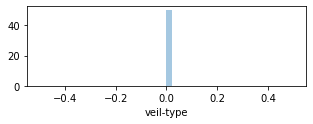

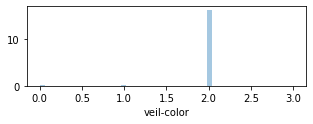

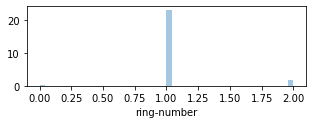

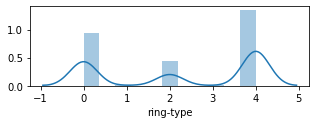

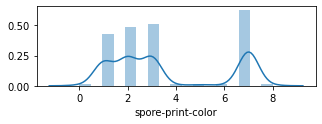

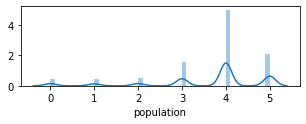

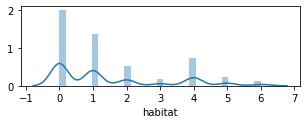

In [12]:
collist = msh.columns.values
for i in range(0,len(collist)):
    plt.figure(figsize = (5,40))
    plt.subplot(23,1,i+1)
    sns.distplot(msh[collist[i]])
    plt.show()

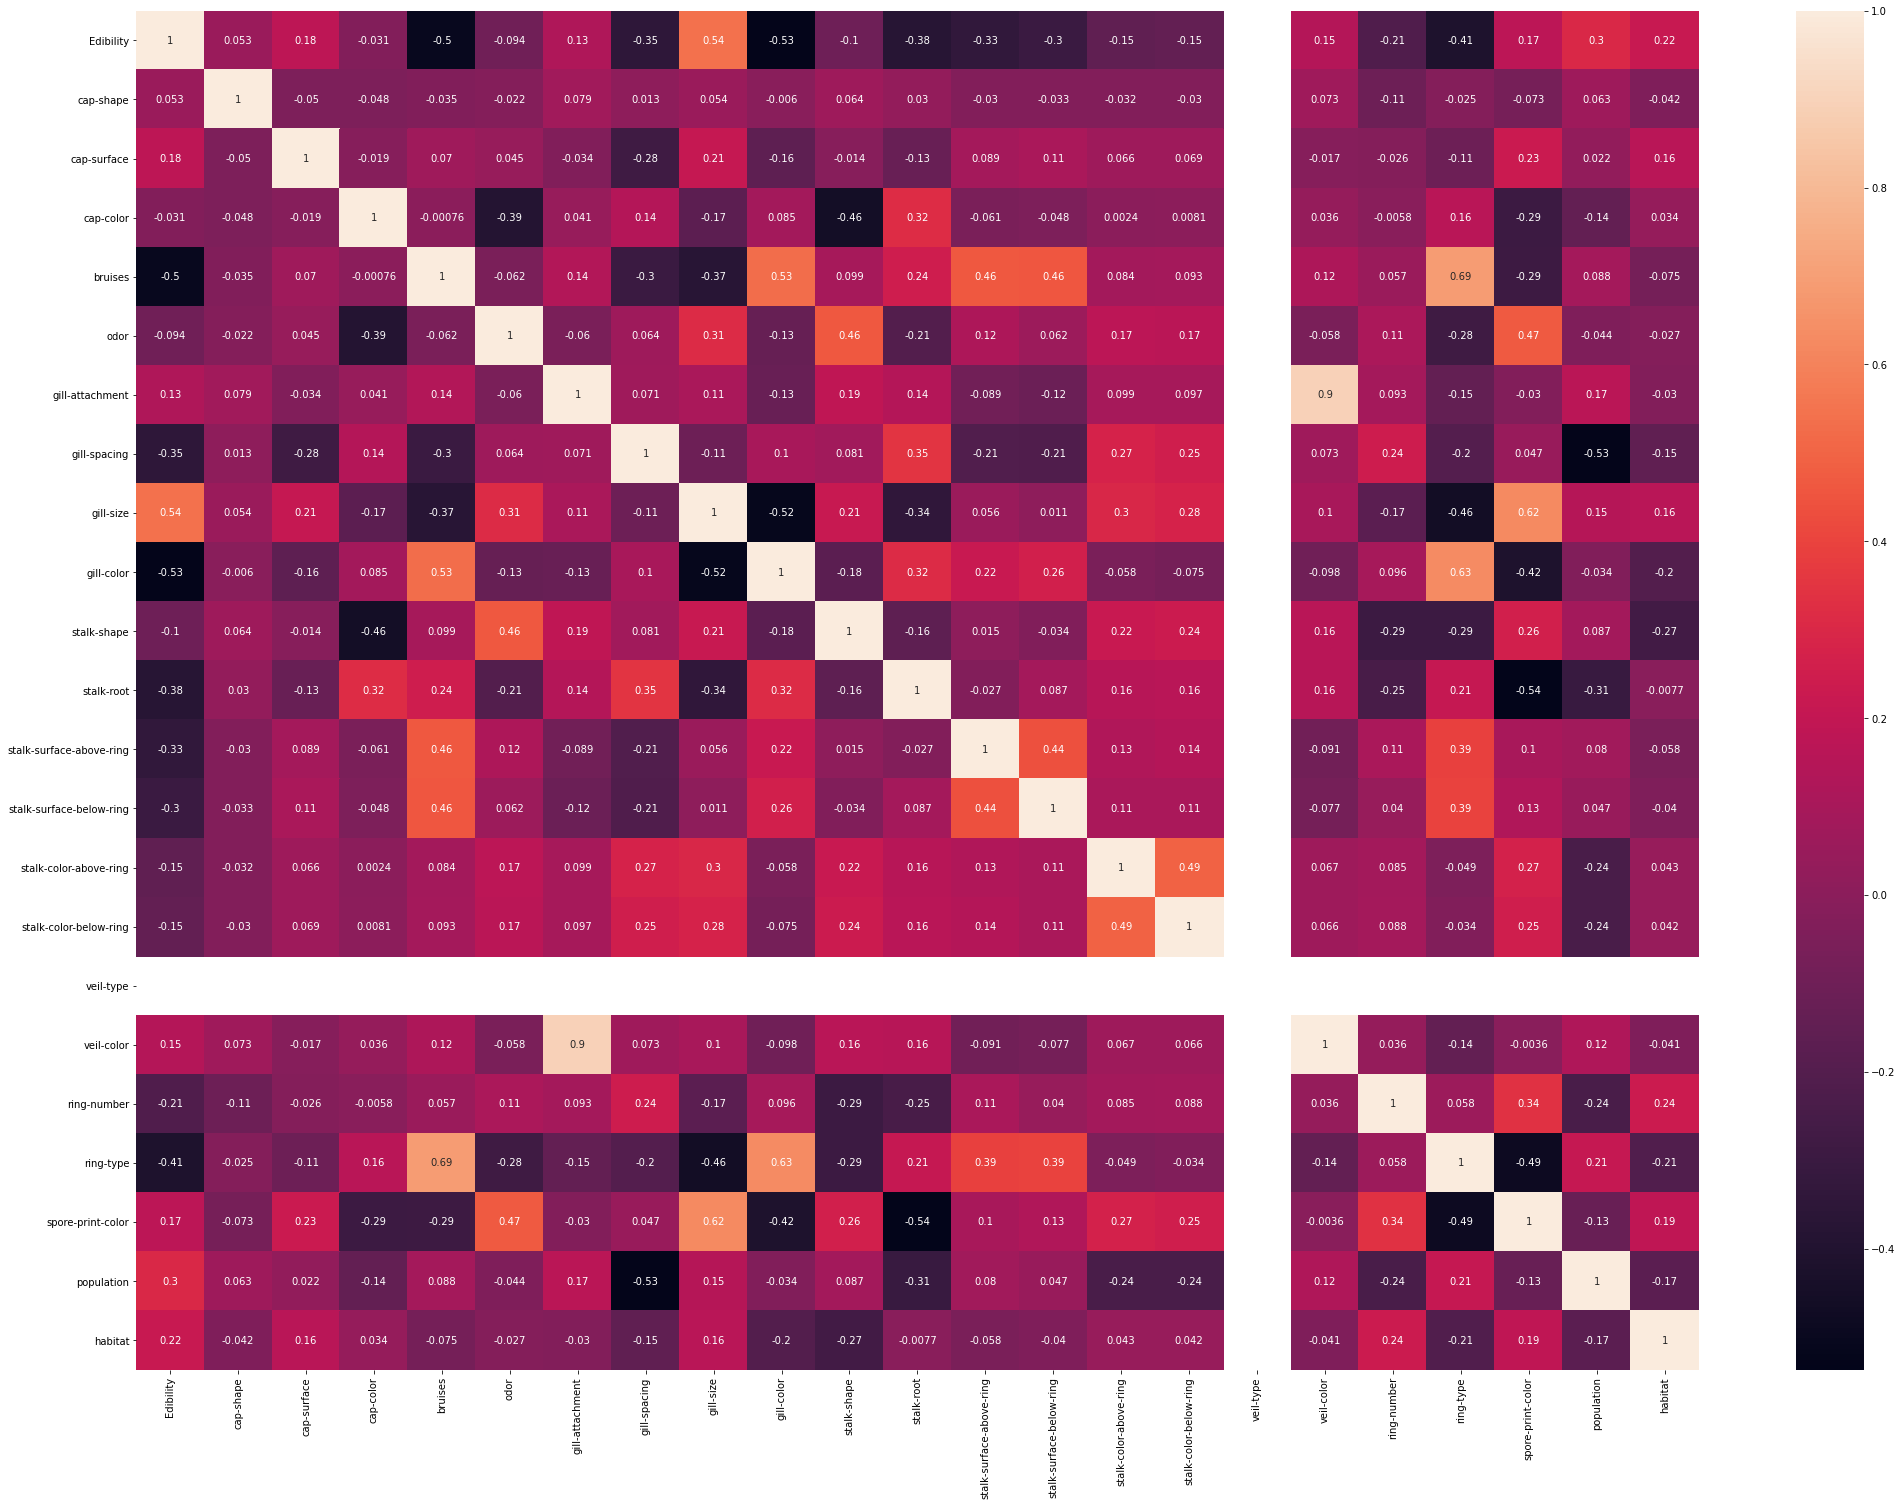

In [27]:
msh_cor = msh.corr()
plt.figure(figsize=(35,25))
sns.heatmap(msh_cor,annot = True)
plt.show()

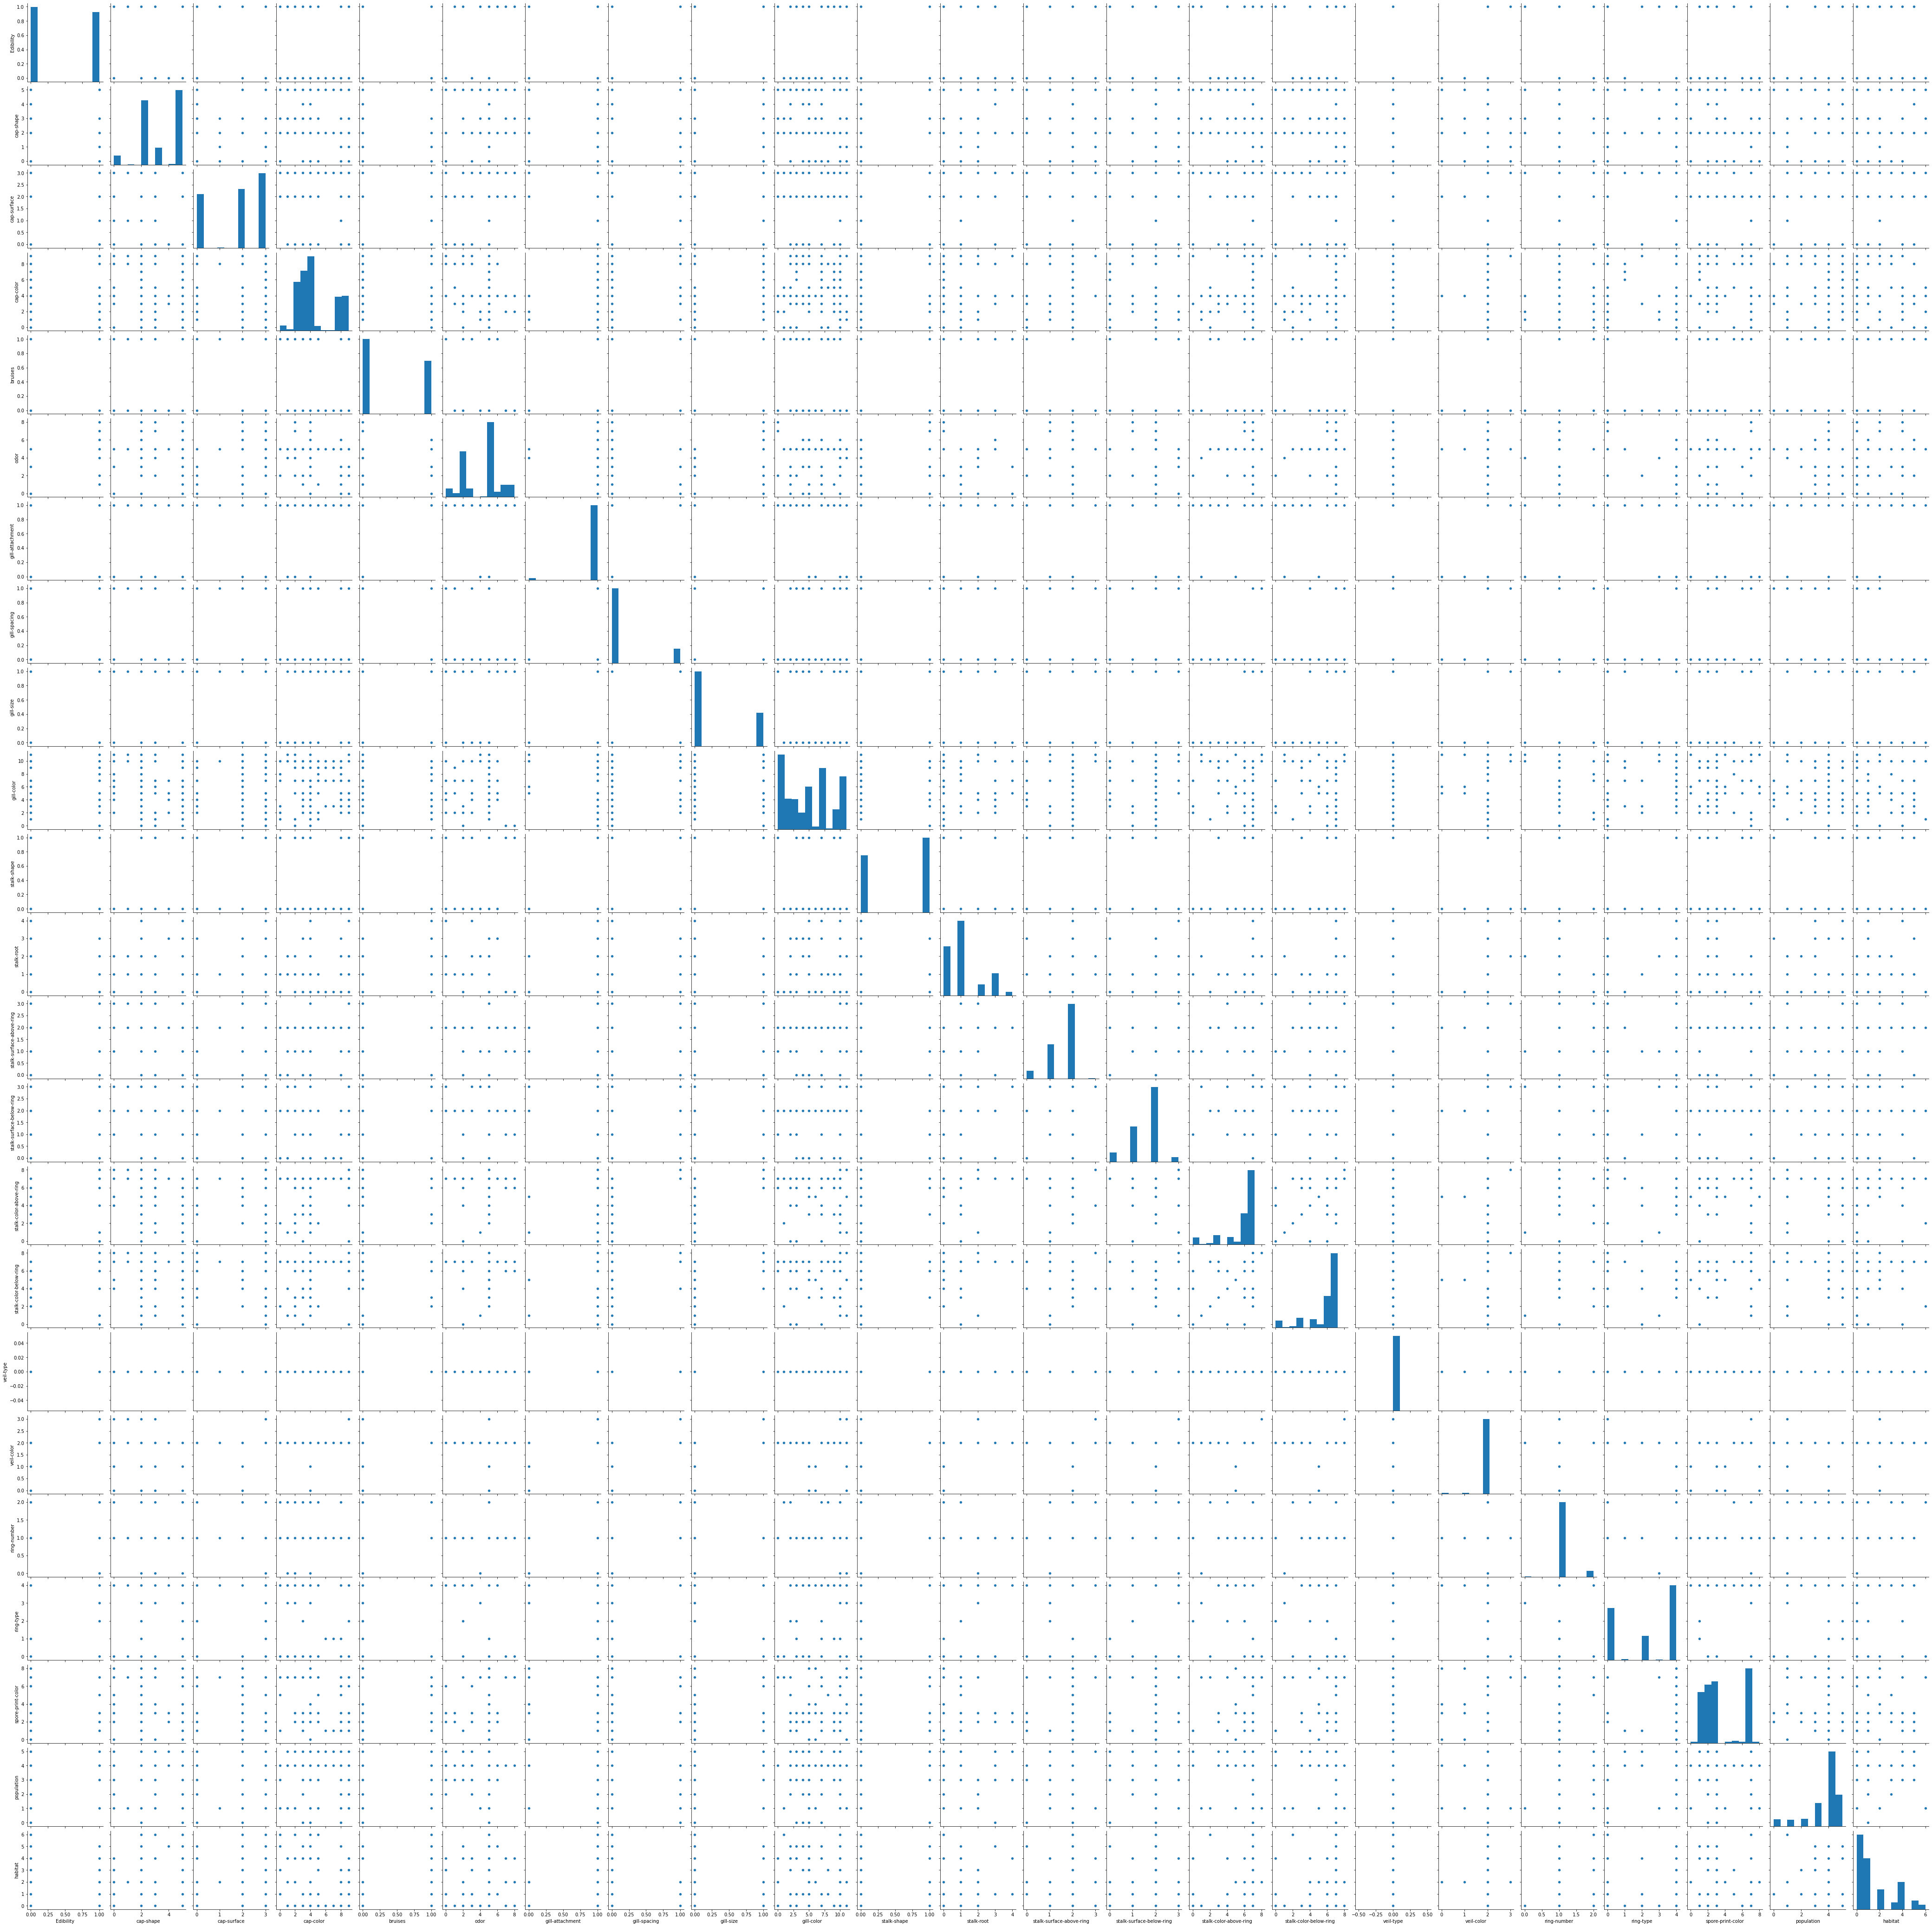

In [28]:
sns.pairplot(msh)

# Building Model

In [25]:
x = msh.iloc[:,0:-1]
y = msh.iloc[:,-1]

In [16]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
x = power_transform(x,method = 'yeo-johnson')
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
# To find the best random state
best_r_state = 0
accu = 0
for i in range (30,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    predlr = lr.predict(x_test)
    lr.score(x_train,y_train)
    tempaccu = accuracy_score(y_test,predlr)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f'For accuracy is {accu * 100}% best random state is {best_r_state}')

For accuracy is 67.89709172259508% best random state is 67


In [18]:
# To find the best fit model
model = [LogisticRegression(), SVC(kernel = 'poly'), SVC(kernel = 'rbf'), SVC(kernel = 'linear'),KNeighborsClassifier(),DecisionTreeClassifier(),GaussianNB()]
for m in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 67)
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    mpred = m.predict(x_test)
    ack=accuracy_score(y_test,mpred)
    cvscore = cross_val_score(m,x,y,cv = 5).mean()
    print(f'accuracy is {ack *100}% & cross_val Score is {cvscore} for model {m}')

accuracy is 67.89709172259508% & cross_val Score is 0.4940597195907541 for model LogisticRegression()
accuracy is 65.1565995525727% & cross_val Score is 0.48089064039408874 for model SVC(kernel='poly')
accuracy is 64.31767337807607% & cross_val Score is 0.48433876468359227 for model SVC()
accuracy is 66.33109619686802% & cross_val Score is 0.48138052292535055 for model SVC(kernel='linear')
accuracy is 56.09619686800895% & cross_val Score is 0.47584297082228105 for model KNeighborsClassifier()
accuracy is 50.83892617449665% & cross_val Score is 0.45725380826070483 for model DecisionTreeClassifier()
accuracy is 38.47874720357942% & cross_val Score is 0.3841801439939371 for model GaussianNB()


In [19]:
# Best Accuracy acheived is for Logistic Regression

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22, random_state = 67)
lr = LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
ack=accuracy_score(y_test,predlr)
cvscore = cross_val_score(lr,x,y,cv = 5).mean()
print(f'accuracy is {ack *100}% & cross_val Score is {cvscore} the difference is  {ack - cvscore}')
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

accuracy is 67.89709172259508% & cross_val Score is 0.4940597195907541 the difference is  0.1849111976351967
[[608  29  14   0  44   0   0]
 [ 38 343   0  32  17  36   0]
 [ 75   0  79   0  31   0   0]
 [  0  33   0  33   0   0   0]
 [119  55  19   0  54   0   0]
 [  0  32   0   0   0  57   0]
 [  0   0   0   0   0   0  40]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       695
           1       0.70      0.74      0.72       466
           2       0.71      0.43      0.53       185
           3       0.51      0.50      0.50        66
           4       0.37      0.22      0.27       247
           5       0.61      0.64      0.63        89
           6       1.00      1.00      1.00        40

    accuracy                           0.68      1788
   macro avg       0.66      0.63      0.64      1788
weighted avg       0.66      0.68      0.66      1788



# Serialization

In [37]:
import joblib
joblib.dump(lr,'Project_5_Mashroom.pkl')

['Project_5_Mashroom.pkl']